In [ ]:
# Import our favorite functions and modules
from scipy.io import loadmat                    # To load .mat files
from pylab import *                             # Import plotting functions
rcParams['figure.figsize']=(20,3)               # Change the default figure size

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


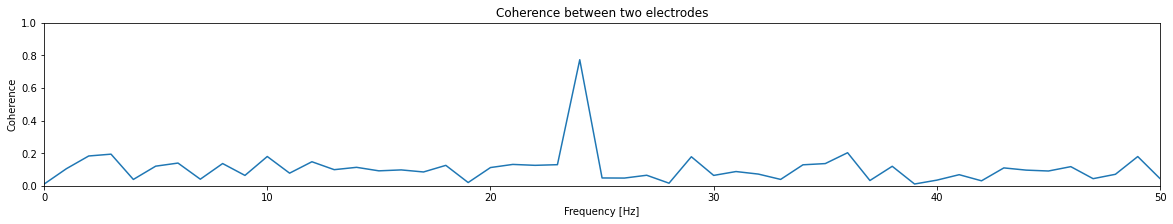

In [ ]:
data = loadmat('/content/gdrive/MyDrive/Colab Notebooks/Data/Python EEG/Case-Studies-Python-student/matfiles/ECoG-1.mat')        # Load the data,
E1 = data['E1']                              # ... from the first electrode,
E2 = data['E2']                              # ... and from the second electrode.
t = data['t'][0]                             # Load the time axis,
dt = t[1] - t[0]                             # ... to get the sampling interval,
T = t[-1]                                    # ... and the total time of the recording.
N = E1.shape[1]                              # Determine the number of sample points per trial
scale = 2 * dt**2 / T                        # Scaling constant

# Compute the Fourier transforms
xf = array([rfft(x - x.mean()) for x in E1]) # ... for each trial in E1
yf = array([rfft(y - y.mean()) for y in E2]) # ... and each trial in E2

# Compute the spectra
Sxx = scale * (xf * xf.conj()).mean(0)       # Spectrum of E1 trials
Syy = scale * (yf * yf.conj()).mean(0)       # ... and E2 trials
Sxy = scale * (xf * yf.conj()).mean(0)       # ... and the cross spectrum

# Compute the coherence.
cohr = abs(Sxy) / (sqrt(Sxx) * sqrt(Syy))

f = rfftfreq(N, dt)                          # Define a frequency axis.
plot(f, cohr.real)                           # Plot coherence vs frequency,
xlim([0, 50])                                # ... in a chosen frequency range,
ylim([0, 1])                                 # ... with y-axis scaled,
xlabel('Frequency [Hz]')                     # ... and with axes labeled.
ylabel('Coherence')
title('Coherence between two electrodes')
show()

## Visual inspection

In [ ]:
data = loadmat('/content/gdrive/MyDrive/Colab Notebooks/Data/Python EEG/Case-Studies-Python-student/matfiles/ECoG-1.mat') # Loading the Data

In [ ]:
data.keys() # The data is in a dictionary. We want to see the keys of the dictionary

dict_keys(['__header__', '__version__', '__globals__', 'E1', 't', 'E2'])

In [ ]:
E1 = data['E1']
E2 = data['E2']
t = data['t'][0]

# Extracting the useful data

In [ ]:
E1.shape # Seeing the shape of the matrix

(100, 500)

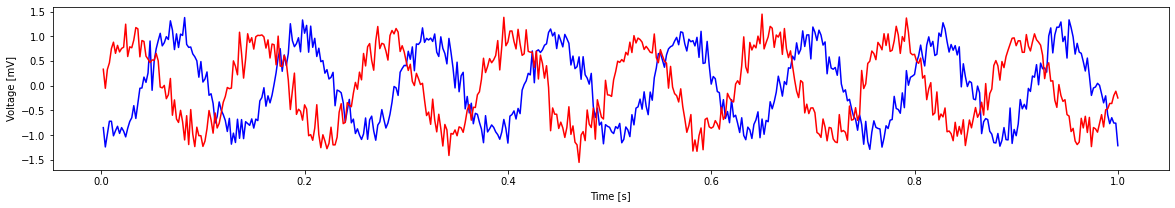

In [ ]:
f, a = subplots()
a.plot(t,E1[0,:], 'b')            # Plot the data from the first trial of one electrode,
a.plot(t,E2[0,:], 'r')            # ... and the first trial of the other electrode.
xlabel('Time [s]');
ylabel('Voltage [mV]');
fig, ax = {'traces': f}, {'traces': a}

# We can see that there is rhythmic activity 

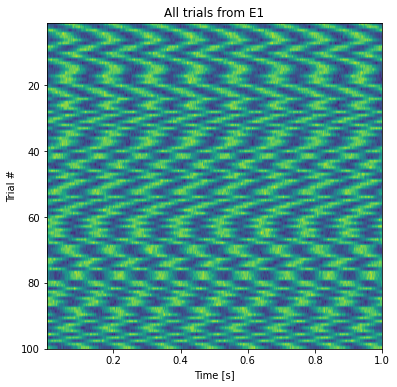

In [ ]:
K = E1.shape[0]                            # Get the number of trials.
f, a = subplots(figsize=(6, 6))            # Make a square axis
a.imshow(E1,                               #... and show the image,
           extent=[min(t), max(t), K, 1],  # ... with meaningful axes,
           aspect='auto')                  # ... and a nice aspect ratio.
xlabel('Time [s]')
ylabel('Trial #');
title('All trials from E1')
show()

# There are 100 trials so we want to dislay them all at once in one coherent graph 
# Blue = Low Voltage ; Green = High Voltage

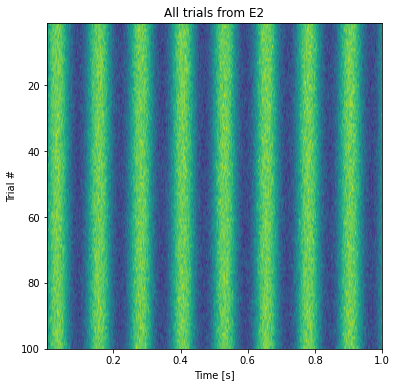

In [ ]:
K = E2.shape[0]                            # Get the number of trials.
f, b = subplots(figsize=(6, 6))            # Make a square axis
b.imshow(E2,                               #... and show the image,
           extent=[min(t), max(t), K, 1],  # ... with meaningful axes,
           aspect='auto')                  # ... and a nice aspect ratio.
xlabel('Time [s]')
ylabel('Trial #');
title('All trials from E2')
show()

# There are 100 trials so we want to dislay them all at once in one coherent graph 
# Blue = Low Voltage ; Green = High Voltage

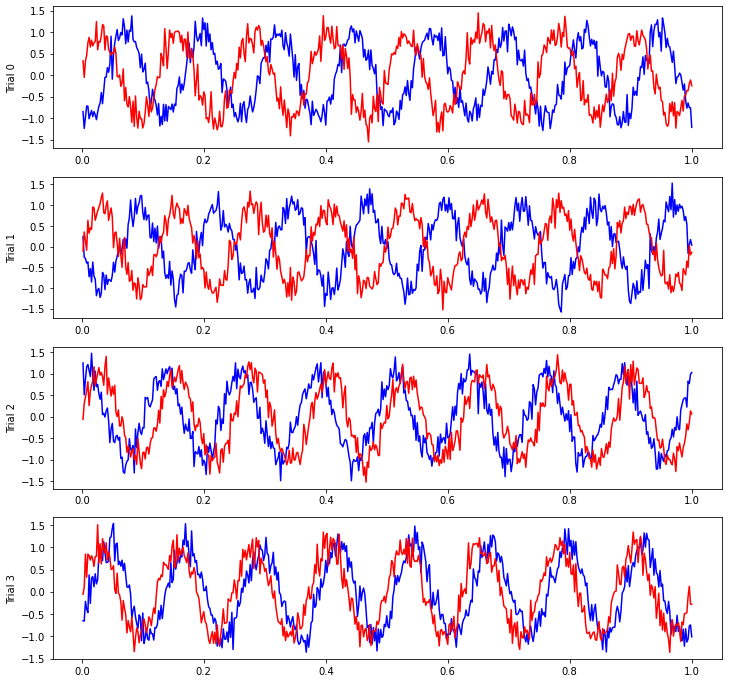

In [ ]:
f, a = subplots(4, 1, figsize=(12, 12))
for j in range(4):
    a[j].plot(t, E1[j], 'b')            # Plot the data from trial j of one electrode,
    a[j].plot(t, E2[j], 'r')            # ... and trial j of the other electrode.
    a[j].set_ylabel('Trial ' + str(j))

# Basic visual inspection of the first 4 trials of E1 and E2
# In the first two trials E1 and E2 are out of phase, in the next 2 they in in phase 

## Autocovariance and Cross-covariance

Text(0.5, 1.0, 'Trial averaged autocovariance')

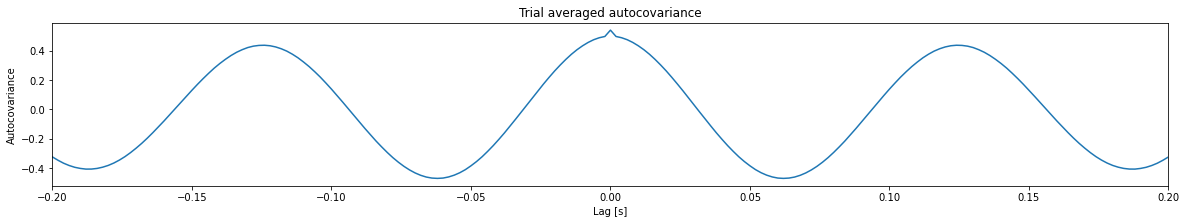

In [ ]:
dt = t[1] - t[0]              # Define the sampling interval.
K = E1.shape[0]               # Define the number of trials.
N = E1.shape[1]               # Define number of points in each trial.
ac = zeros([2 * N - 1])       # Declare empty vector for autocov.

for trial in E1:              # For each trial,
    x = trial - trial.mean()  # ... subtract the mean,
    ac0 = 1 / N * correlate(x, x, 'full')  # ... compute autocovar,
    ac += ac0 / K;            # ... and add to total, scaled by 1/K.

lags = arange(-N + 1, N)      # Create a lag axis,
plot(lags * dt, ac)           # ... and plot the result.
xlim([-0.2, 0.2])
xlabel('Lag [s]')
ylabel('Autocovariance');
title('Trial averaged autocovariance')

# We see three peaks of dominant rhythmic activty in the first electrode. One at 0s, and two others at +/- 0.125s 


Text(0.5, 1.0, 'Trial averaged autocovariance')

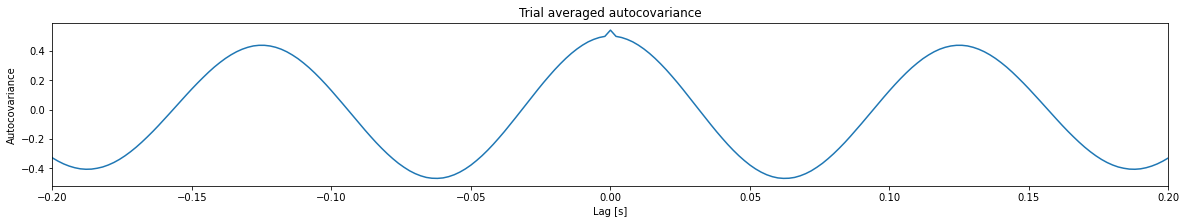

In [ ]:
# Doing it for the second electrode

dt = t[1] - t[0]              # Define the sampling interval.
K = E2.shape[0]               # Define the number of trials.
N = E2.shape[1]               # Define number of points in each trial.
ac = zeros([2 * N - 1])       # Declare empty vector for autocov.

for trial in E2:              # For each trial,
    x = trial - trial.mean()  # ... subtract the mean,
    ac0 = 1 / N * correlate(x, x, 'full')  # ... compute autocovar,
    ac += ac0 / K;            # ... and add to total, scaled by 1/K.

lags = arange(-N + 1, N)      # Create a lag axis,
plot(lags * dt, ac)           # ... and plot the result.
xlim([-0.2, 0.2])
xlabel('Lag [s]')
ylabel('Autocovariance');
title('Trial averaged autocovariance')

# We see the same results as in E1

Text(0.5, 1.0, 'Cross covariance between two electrodes during the first trial')

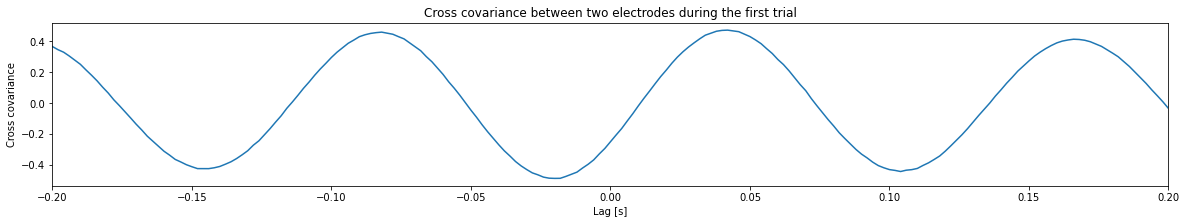

In [ ]:
# We want to find if the two electrodes are coupled. So we calculate cross-variance.

x = E1[0,:] - mean(E1[0,:])  # Define one time series,
y = E2[0,:] - mean(E2[0,:])  # ... and another.
xc=1/N*correlate(x,y,2)      # ... and compute their cross covariance.
lags = arange(-N+1,N)        # Create a lag axis,
plot(lags*dt,xc)             # ... and plot the cross covariance vs lags in time.

xlim([-0.2, 0.2])            # In a nice range, with axes labelled.
xlabel('Lag [s]')
ylabel('Cross covariance');
title('Cross covariance between two electrodes during the first trial')